In [1]:
import matplotlib.pyplot as plt
from datasets.mathprim.marked_integer_dataset import MixedSprites3Dataset

train_dataset = MixedSprites3Dataset(dataset_size=1024)  # create a dataset with 1024 samples
test_dataset = MixedSprites3Dataset(dataset_size=128)  # create a dataset with 128 samples for testing
corpus = [data[1]["query"] for data in train_dataset]

#from data.collect_corpus import write_vocab, load_corpus, build_vocab
#vocab = build_vocab([] + corpus)
##write_vocab(vocab)


In [ ]:
from core.model import MetaLearner
learner = MetaLearner([])
learner.load_ckpt("outputs/checkpoints/s3d")
### load the meta learner from the pretrained-checkpoint
pass


15 16:41:50 WRN The input domain is empty, creating an empty domain
15 16:41:50 WRN The input domain is empty, creating an empty domain
15 16:41:50 Function exists automatically registered.
15 16:41:50 Function forall automatically registered.
15 16:41:50 Function iota automatically registered.
15 16:41:50 Function negate automatically registered.
15 16:41:50 Function logic_and automatically registered.
15 16:41:50 Function logic_or automatically registered.
15 16:41:50 Function count automatically registered.
15 16:41:50 Function scene automatically registered.
15 16:41:50 Function red automatically registered.
15 16:41:50 Function green automatically registered.
15 16:41:50 Function blue automatically registered.
15 16:41:50 WRN The input domain is empty, creating an empty domain
15 16:41:50 WRN The input domain is empty, creating an empty domain


# Base Knowledge Learning


15 16:41:50 Filter dataset None: #before=1024, #after=502.
15 16:41:50 Filter dataset None: #before=128, #after=65.


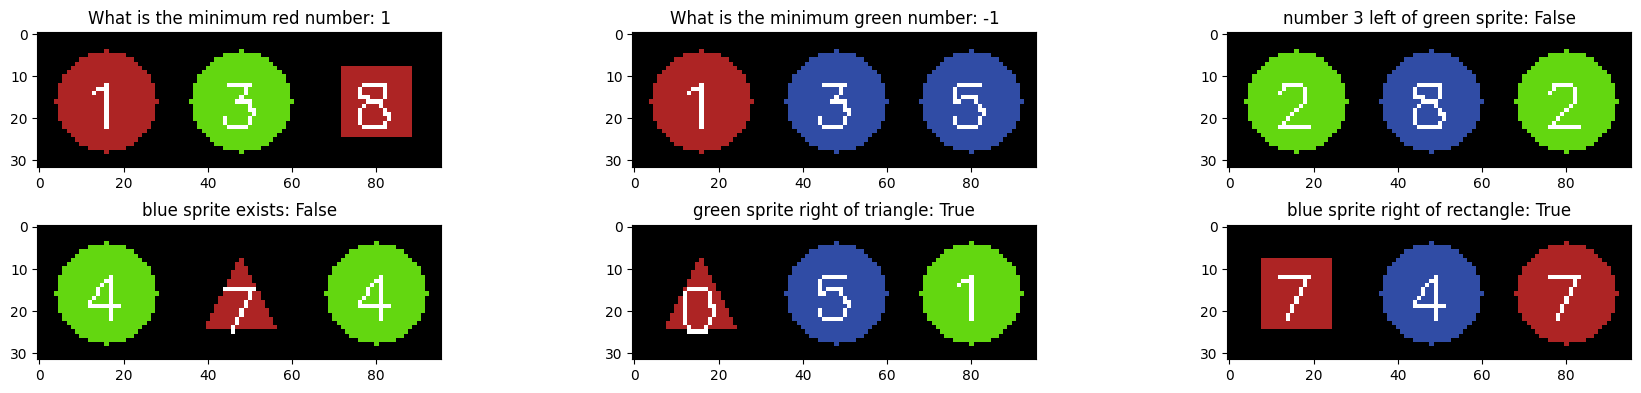

15 16:41:51 start to learn the words ['exists', 'triangle'], add corpus size 28
Training epochs:  58%|█████▊    | 58/100 [01:54<01:22,  1.97s/epoch, avg_loss=0.0686, avg_acc=0.6548]


RuntimeError: No Valid Parse Found.

In [3]:
from core.learn import AutoLearnSchedule
train_logic_dataset = train_dataset.filter(lambda x : x["question_type"] == "boolean")
test_logic_dataset = test_dataset.filter(lambda x : x["question_type"] == "boolean")

# Now let's visualize a few samples from the dataset:


plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_dataset[i]['image'].permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)
    plt.title(train_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()


schedule = AutoLearnSchedule(train_logic_dataset)
schedule.procedual_train(learner)

In [ ]:
#learner.save_ckpt("outputs/checkpoints/s3d") # avg_loss=1.5080, avg_acc=0.6488


0

+---------------+------------+------------------------------+
| parse-tree    |     weight | answer                       |
+===============+============+==============================+
| forall        | 0.532047   | Value:[-9.8997]-bool P:[1.0] |
| └── red       |            |                              |
|     └── scene |            |                              |
+---------------+------------+------------------------------+
| exists        | 0.196047   | Value:[10.0000]-bool P:[1.0] |
| └── red       |            |                              |
|     └── scene |            |                              |
+---------------+------------+------------------------------+
| forall        | 0.0978877  | Value:[-9.4393]-bool P:[1.0] |
| └── blue      |            |                              |
|     └── scene |            |                              |
+---------------+------------+------------------------------+
| forall        | 0.0771332  | Value:[-9.9183]-bool P:[1.0] |
| └── gr

'+---------------+------------+------------------------------+\n| parse-tree    |     weight | answer                       |\n+===============+============+==============================+\n| forall        | 0.532047   | \x1b\x1bValue\x1b\x1b:[\x1b\x1b-9.8997\x1b\x1b[97m]-\x1b\x1bbool\x1b \x1b\x1bP\x1b\x1b:[\x1b\x1b1.0\x1b\x1b[97m]\x1b |\n| └── red       |            |                              |\n|     └── scene |            |                              |\n+---------------+------------+------------------------------+\n| exists        | 0.196047   | \x1b\x1bValue\x1b\x1b:[\x1b\x1b10.0000\x1b\x1b[97m]-\x1b\x1bbool\x1b \x1b\x1bP\x1b\x1b:[\x1b\x1b1.0\x1b\x1b[97m]\x1b |\n| └── red       |            |                              |\n|     └── scene |            |                              |\n+---------------+------------+------------------------------+\n| forall        | 0.0978877  | \x1b\x1bValue\x1b\x1b:[\x1b\x1b-9.4393\x1b\x1b[97m]-\x1b\x1bbool\x1b \x1b\x1bP\x1b\x1b:[\x1b\x1b1.0

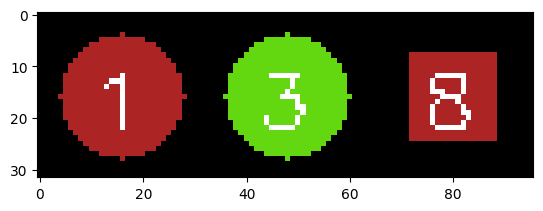

In [6]:
from helchriss.dsl.dsl_types import BOOL

image = train_dataset[0]['image']
plt.imshow(image.permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)
learner.execute_display("exists circle", grounding = {"image":image}, tp = BOOL,  topK = 10)

In [ ]:
for (entry, weight) in learner.maximal_parse("exists circle", tp = BOOL):print(entry, weight)

exists:Objects(green:Objects(scene:Objects())) tensor(-0.9925, grad_fn=<UnbindBackward0>)
forall:Objects(red:Objects(scene:Objects())) tensor(-2.1043, grad_fn=<UnbindBackward0>)
exists:Objects(scene:Objects()) tensor(-2.6570, grad_fn=<UnbindBackward0>)
exists:Objects(red:Objects(scene:Objects())) tensor(-2.7287, grad_fn=<UnbindBackward0>)
exists:Objects(blue:Objects(scene:Objects())) tensor(-3.0210, grad_fn=<UnbindBackward0>)
exists:Objects(red:Objects(scene:Objects())) tensor(-3.1027, grad_fn=<UnbindBackward0>)
forall:Objects(blue:Objects(scene:Objects())) tensor(-3.1997, grad_fn=<UnbindBackward0>)
forall:Objects(scene:Objects()) tensor(-3.2447, grad_fn=<UnbindBackward0>)
forall:Objects(green:Objects(scene:Objects())) tensor(-3.5365, grad_fn=<UnbindBackward0>)
forall:Objects(green:Objects(scene:Objects())) tensor(-3.7932, grad_fn=<UnbindBackward0>)
forall:Objects(iota:Objects(scene:Objects())) tensor(-3.8071, grad_fn=<UnbindBackward0>)
negate:Objects(exists:Objects(scene:Objects())) t

# Continual Learning Concepts
MetaLearner can continually learning new concepts using only language description of the new word and the related domain entries.

14 20:35:55 Filter dataset None: #before=1024, #after=1024.
14 20:35:55 Filter dataset None: #before=128, #after=128.


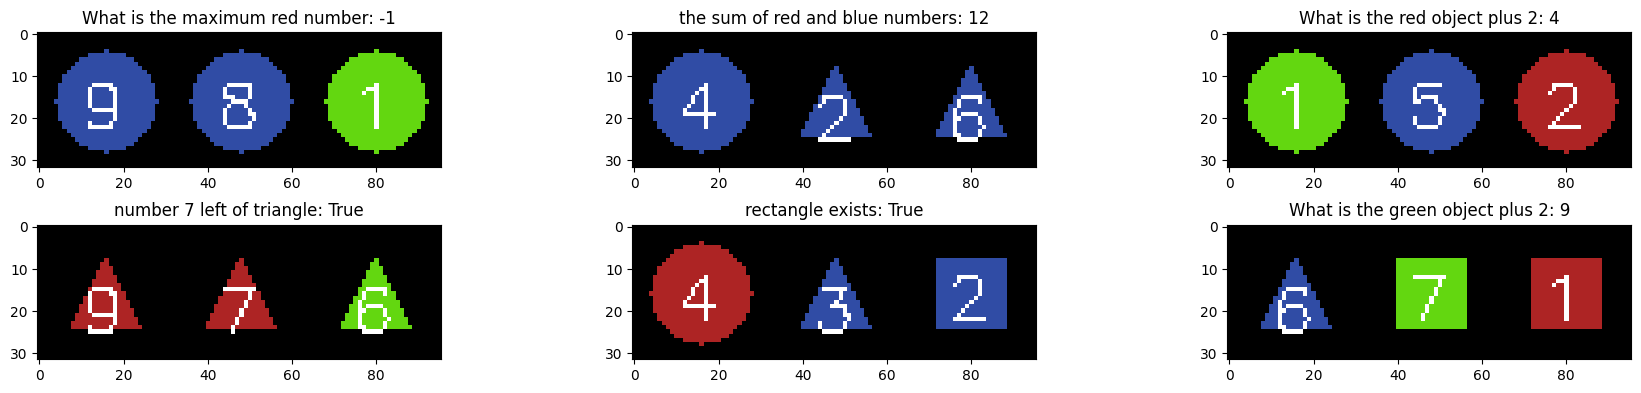

In [ ]:
### Continual Learning of New Concepts
import matplotlib.pyplot as plt
from datasets.mathprim.marked_integer_dataset import MixedSprites3Dataset

train_dataset = MixedSprites3Dataset(dataset_size=1024)  # create a dataset with 1024 samples
test_dataset = MixedSprites3Dataset(dataset_size=128)  # create a dataset with 128 samples for testing
corpus = [data[1]["query"] for data in train_dataset]

#from data.collect_corpus import write_vocab, load_corpus, build_vocab
#vocab = build_vocab([] + corpus)
##write_vocab(vocab)

train_arith_dataset = train_dataset.filter(lambda x : x["question_type"] in ['boolean', "arithmetic"])
test_arith_dataset = test_dataset.filter(lambda x : x["question_type"] in ['boolean', "arithmetic"])

plt.figure(figsize=(18, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_dataset[i]['image'].permute(1, 2, 0).numpy()[..., ::-1] * 0.5 + 0.5)
    plt.title(train_dataset[i]['query'] + ': ' + str(train_dataset[i]['answer']))
    #stprint(train_dataset[i])
plt.tight_layout()
plt.show()


In [ ]:
from core.metaphors.types import *
from helchriss.dsl.dsl_types import FLOAT

if __name__ == "__main__":
    # 1. 定义初始类型和目标类型
    # 初始类型：List[Vector[float, 3]]
    initial_type = ListType(
        element_type=VectorType(elem_type=FLOAT, dim=3)
    )
    # 目标类型：List[Embedding["vec3", 3]]
    target_type = ListType(
        element_type=EmbeddingType(space_name="vec3", dim=3)
    )

    # 2. 定义转换规则：将Vector[float, d]转换为Embedding["vec3", d]
    # 模式：List[Vector[float, $d]]（$d是变量，匹配维度）
    rule_pattern = ListType(
        element_type=VectorType(elem_type=FLOAT, dim=PatternVar("$d"))  # $d匹配任意维度
    )
    # 转换函数：用绑定的$d生成Embedding
    def vec_to_embedding(bindings: Dict[str, TypeBase]) -> TypeBase:
        d = bindings["d"]  # $d绑定的是Vector的dim（int）
        return ListType(
            element_type=EmbeddingType(space_name="vec3", dim=d)
        )
    transform_rule = TransformRule(
        pattern=rule_pattern,
        transform_func=vec_to_embedding
    )

    # 3. 查找转换路径
    path = find_transform_path(
        initial_type=initial_type,
        target_type=target_type,
        rules=[transform_rule],
        max_depth=3
    )

    # 4. 输出结果
    if path:
        print(f"找到从 {initial_type} 到 {target_type} 的转换路径：")
        for i, (rule, bindings) in enumerate(path):
            print(f"步骤{i+1}：应用规则，变量绑定：")
            for var, typ in bindings.items():
                print(f"  ${var} = {typ}")
    else:
        print(f"无法从 {initial_type} 转换到 {target_type}")





无法从 List[Vector[float,3]] 转换到 List[Embedding[vec3, 3]]


In [ ]:
from helchriss.dsl.dsl_types import BOOL

initial_type = ListType(
        element_type=TupleType([EmbeddingType("set", 128), BOOL])
    )

target_type = ListType(
        element_type=TupleType([PatternVar("$d"), BOOL])
    )

matches = match_pattern(initial_type, target_type)

if matches is not None:
    for var in matches:print(var, matches[var])
else:print("No Match Found")

$d Embedding[set, 128]
